# Categorical Encoding - Pandas

## 1. One Hot Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# load dataset

usecols = ["pclass", "sibsp", "parch", "sex", "embarked", "cabin", "survived"]

data = pd.read_csv("../../titanic.csv", usecols=usecols)

data["cabin"] = data["cabin"].str[0]

data.head()

,pclass,survived,sex,sibsp,parch,cabin,embarked
0,1,1,female,0,0,B,S
1,1,1,male,1,2,C,S
2,1,0,female,1,2,C,S
3,1,0,male,1,2,C,S
4,1,0,female,1,2,C,S


In [3]:
target  = 'survived'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (916, 6)
X_test shape: (393, 6)
y_train shape: (916,)
y_test shape: (393,)


In [4]:
# Let's explore the cardinality 

cols = ['sex', 'embarked', 'cabin']

for i in cols:
    print(f'{i}: {X_train[i].unique()}')
    print()

sex: ['female' 'male']

embarked: ['S' 'C' 'Q' nan]

cabin: [nan 'E' 'C' 'D' 'B' 'A' 'F' 'T' 'G']



### into k dummy variables

In [5]:
# and now let's repeat for embarked

tmp = pd.get_dummies(X_train['embarked'])
tmp.head()

,C,Q,S
501,0,0,1
588,0,0,1
402,1,0,0
1193,0,1,0
686,0,1,0


In [6]:
# for better visualization let's put hte dummies 
# next to the original variable
pd.concat([X_train["embarked"], 
           pd.get_dummies(X_train["embarked"])], axis=1).head()

,embarked,C,Q,S
501,S,0,0,1
588,S,0,0,1
402,C,1,0,0
1193,Q,0,1,0
686,Q,0,1,0


In [7]:
# and now for all variables together: train set

# ========
# get_dummies automatically recognises variables of type
# object and categorical, ignoring numerical variables.
# ========

X_train_enc = pd.get_dummies(X_train)

print('X_train', X_train.shape)
print('X_train_enc', X_train_enc.shape)

X_train (916, 6)
X_train_enc (916, 16)


In [8]:
X_train_enc.head()

,pclass,sibsp,parch,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,embarked_C,embarked_Q,embarked_S
501,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
588,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
402,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1193,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
686,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
X_train.columns

Index(['pclass', 'sex', 'sibsp', 'parch', 'cabin', 'embarked'], dtype='object')

In [10]:
X_train_enc.columns

Index(['pclass', 'sibsp', 'parch', 'sex_female', 'sex_male', 'cabin_A',
       'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G',
       'cabin_T', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [11]:
# and now for all variables together: test set

X_test_enc = pd.get_dummies(X_test)

print(X_test_enc.shape)

X_test_enc.head()

(393, 15)


,pclass,sibsp,parch,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,embarked_C,embarked_Q,embarked_S
1139,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
533,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1
459,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1150,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
393,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### into k-1 dummy variables

In [12]:
# for better visualization let's put hte dummies 
# next to the original variable
pd.concat([X_train["embarked"], 
           pd.get_dummies(X_train["embarked"], drop_first=True)], axis=1).head()

,embarked,Q,S
501,S,0,1
588,S,0,1
402,C,0,0
1193,Q,1,0
686,Q,1,0


In [13]:
# and now for all variables together: train set

# ========
# get_dummies automatically recognises variables of type
# object and categorical, ignoring numerical variables.
# ========

X_train_enc = pd.get_dummies(X_train, drop_first=True)

print('X_train', X_train.shape)
print('X_train_enc', X_train_enc.shape)

X_train (916, 6)
X_train_enc (916, 13)


In [14]:
# altogether: test set

X_test_enc = pd.get_dummies(X_test, drop_first=True)

print(X_test_enc.shape)

X_test_enc.head()

(393, 12)


,pclass,sibsp,parch,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,embarked_Q,embarked_S
1139,3,0,0,1,0,0,0,0,0,0,0,1
533,2,0,1,0,0,0,0,0,0,0,0,1
459,2,1,0,1,0,0,0,0,0,0,0,1
1150,3,0,0,1,0,0,0,0,0,0,0,1
393,2,0,0,1,0,0,0,0,0,0,0,1


### get_dummies() can handle missing values

In [15]:
# we can add an additional dummy variable to indicate missing data

pd.get_dummies(X_train['embarked'], drop_first=True, dummy_na=True).head()

,Q,S,NaN
501,0,1,0
588,0,1,0
402,0,0,0
1193,1,0,0
686,1,0,0


## 2. Ordinal Encoding

In [16]:
# load dataset

data = pd.read_csv(
    "../../houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [17]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [18]:
# Let's explore the cardinality 

cols = ["Neighborhood", "Exterior1st", "Exterior2nd",]

for i in cols:
    print(f'{i}:\n{data[i].unique()} \n\n')

Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 


Exterior1st:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 


Exterior2nd:
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 




In [19]:
target  = 'SalePrice'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1022, 3)
X_test shape: (438, 3)
y_train shape: (1022,)
y_test shape: (438,)


In [20]:
# first let's create a dictionary with the mappings of categories to numbers

# ordinal_mapping =  {}
# for i, k in enumerate(X_train['Neighborhood'].unique()):
#     mapping[k] = i
# ordinal_mapping

ordinal_mapping = {k: i for i, k in enumerate(X_train['Neighborhood'].unique())}

In [21]:
# replace the labels with the integers

X_train["Neighborhood"] = X_train["Neighborhood"].map(ordinal_mapping)
X_test["Neighborhood"] = X_test["Neighborhood"].map(ordinal_mapping)

In [22]:
# let's explore the result
X_train['Neighborhood'].head(10)

64      0
682     1
960     2
1384    3
1100    4
416     5
1034    6
853     7
472     3
1011    3
Name: Neighborhood, dtype: int64

### Creating functions to automate

In [23]:
# we can turn the previous commands into 2 functions

def find_category_mappings(df, variable):
    return {k:i for i,k in enumerate(df[variable].unique(),0)}

def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [24]:
# now we run a loop over the remaining categorical variables

for col in cols[1:]:
    mappings = find_category_mappings(X_train, col)
    integer_encode(X_train, X_test, col, mappings)

In [25]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,0,0,0
682,1,1,1
960,2,1,2
1384,3,2,3
1100,4,1,1


## 3. Count or Frequency Encoding

In [26]:
# load dataset

data = pd.read_csv(
    "../../houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [27]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [28]:
# Let's explore the cardinality 

cols = ["Neighborhood", "Exterior1st", "Exterior2nd",]

for i in cols:
    print(f'{i}:\n{data[i].unique()} \n\n')

Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 


Exterior1st:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 


Exterior2nd:
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 




In [29]:
target  = 'SalePrice'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1022, 3)
X_test shape: (438, 3)
y_train shape: (1022,)
y_test shape: (438,)


### Count

In [30]:
# let's obtain the counts for each one of the labels 
# in the variable Neighbourhood

count_map = X_train['Neighborhood'].value_counts().to_dict()
count_map

# the dictionary contains the number of observations per category 
# in the variable Neighbourhood

{'NAmes': 151,
 'CollgCr': 105,
 'OldTown': 73,
 'Edwards': 71,
 'Sawyer': 61,
 'Somerst': 56,
 'Gilbert': 55,
 'NWAmes': 51,
 'NridgHt': 51,
 'SawyerW': 45,
 'BrkSide': 41,
 'Mitchel': 36,
 'Crawfor': 35,
 'Timber': 30,
 'NoRidge': 30,
 'ClearCr': 24,
 'IDOTRR': 24,
 'SWISU': 18,
 'StoneBr': 16,
 'Blmngtn': 12,
 'MeadowV': 12,
 'BrDale': 10,
 'NPkVill': 7,
 'Veenker': 6,
 'Blueste': 2}

In [31]:
# replace the labels with the counts

X_train['Neighborhood'] = X_train['Neighborhood'].map(count_map)
X_test['Neighborhood'] = X_test['Neighborhood'].map(count_map)

In [32]:
# let's explore the result

X_train["Neighborhood"].head(10)

64      105
682      24
960      41
1384     71
1100     18
416      61
1034     35
853     151
472      71
1011     71
Name: Neighborhood, dtype: int64

### Frequency

In [33]:
frequency_map = X_train["Exterior2nd"].value_counts(normalize=True).to_dict()
frequency_map

{'VinylSd': 0.34540117416829746,
 'Wd Sdng': 0.13894324853228962,
 'HdBoard': 0.1379647749510763,
 'MetalSd': 0.13307240704500978,
 'Plywood': 0.1095890410958904,
 'CmentBd': 0.03816046966731898,
 'Wd Shng': 0.02837573385518591,
 'BrkFace': 0.01761252446183953,
 'AsbShng': 0.016634050880626222,
 'Stucco': 0.015655577299412915,
 'ImStucc': 0.007827788649706457,
 'Stone': 0.003913894324853229,
 'Brk Cmn': 0.003913894324853229,
 'AsphShn': 0.0009784735812133072,
 'CBlock': 0.0009784735812133072,
 'Other': 0.0009784735812133072}

In [34]:
# replace the labels with the frequencies

X_train["Exterior2nd"] = X_train["Exterior2nd"].map(frequency_map)
X_test["Exterior2nd"] = X_test["Exterior2nd"].map(frequency_map)

### Creating functions to automate

#### count

In [35]:
#  we are making changes directly to the original data, 
# for safety purposes, it better to make a copy of the data.
def count_encoding(data, variable):
    count_map = data[variable].value_counts().to_dict()
    data[variable] = data[variable].map(count_map)


#### frequency

In [36]:
#  we are making changes directly to the original data, 
# for safety purposes, it better to make a copy of the data.

def frequency_encoding(data, variable):
    frequency_map = data[variable].value_counts(normalize=True).to_dict()
    data[variable] = data[variable].map(frequency_map)

## 4. Ordered Ordinal Encoding

In [37]:
# load dataset

data = pd.read_csv(
    "../../houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [38]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [39]:
# Let's explore the cardinality 

cols = ["Neighborhood", "Exterior1st", "Exterior2nd",]

for i in cols:
    print(f'{i}:\n{data[i].unique()} \n\n')

Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 


Exterior1st:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 


Exterior2nd:
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 




In [40]:
target  = 'SalePrice'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1022, 3)
X_test shape: (438, 3)
y_train shape: (1022,)
y_test shape: (438,)


### Let's explore the original relationship b/w the Categorical variables and target

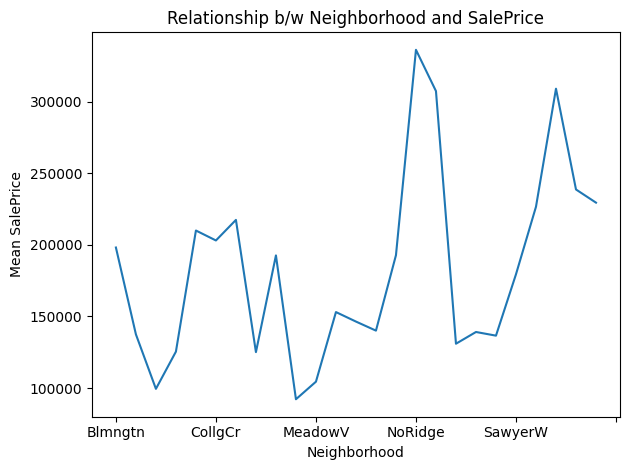

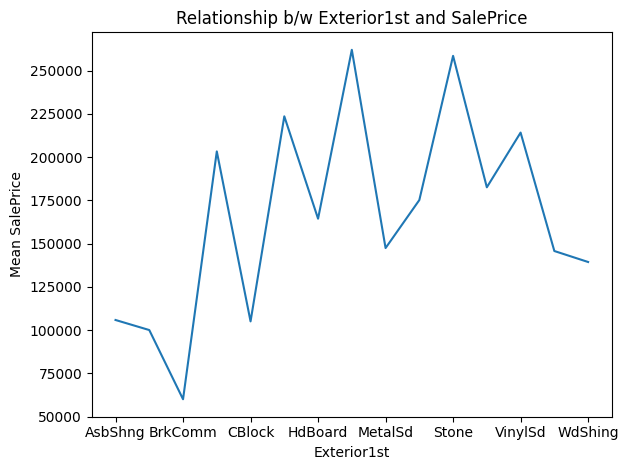

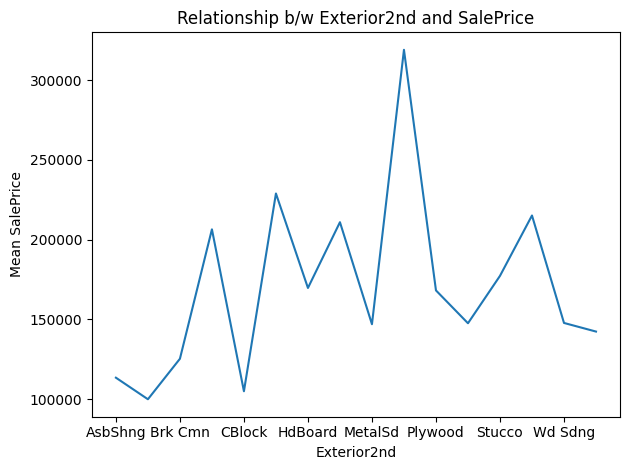

In [41]:
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_train.groupby(X_train[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and SalePrice')
    ax.set_ylabel('Mean SalePrice')
    plt.tight_layout()
    plt.show()

In [42]:
# # let's order the labels according to the mean target value

# y_train.groupby(X_train['Neighborhood']).mean().sort_values()

In [43]:
# # first we generate an ordered list with the labels

# ordered_labels = y_train.groupby(
#     X_train['Neighborhood']).mean().sort_values().index

# ordered_labels

In [44]:
# # next lets create a dictionary with the mappings of categories to numbers

# ordered_ordinal_mapping = {k: i for i,k in enumerate(ordered_labels, 0)}
# ordered_ordinal_mapping

In [45]:
# # now, we replace the labels with the integers

# X_train["Neighborhood"] = X_train["Neighborhood"].map(ordinal_mapping)
# X_test["Neighborhood"] = X_test["Neighborhood"].map(ordinal_mapping)

In [46]:
# # let's explore the result

# X_train["Neighborhood"].head(10)

### Creating functions to automate

In [47]:
#  we are making changes directly to the original data, 
# for safety purposes, it better to make a copy of the data.

def find_category_mappings(df, variable, target):
    
    # first we generate an ordered list with the labels
    ordered_labels = target.groupby(df[variable]).mean().sort_values().index
    
    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordered_ordinal_mapping):
    train[variable] = train[variable].map(ordered_ordinal_mapping)
    test[variable] = test[variable].map(ordered_ordinal_mapping)
    return train[variable]

In [48]:
# and now we run a loop over the remaining categorical variables

for variable in cols:
    mappings = find_category_mappings(X_train, variable, y_train)
    integer_encode(X_train, X_test, variable, mappings)

In [49]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


### Exploring the Monotonic Relationship b/w variables and target

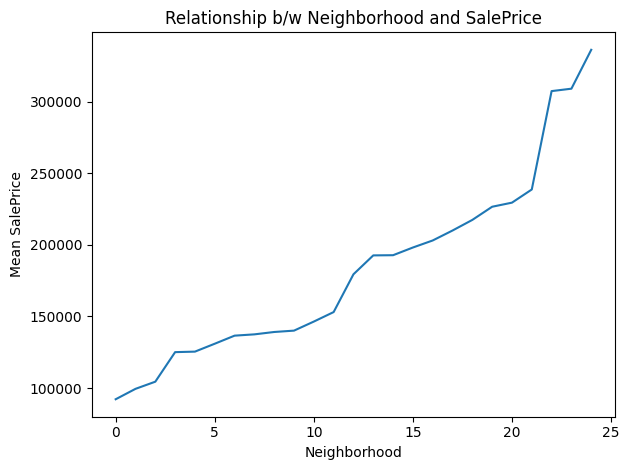

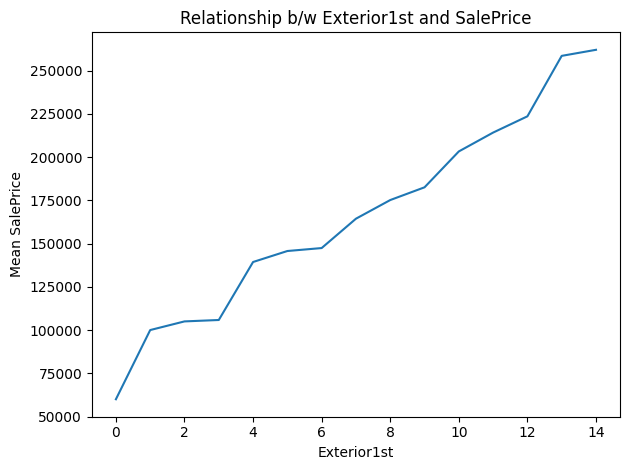

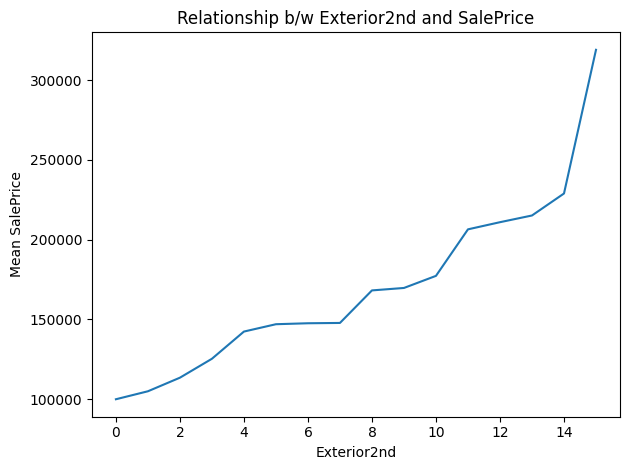

In [50]:
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_train.groupby(X_train[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and SalePrice')
    ax.set_ylabel('Mean SalePrice')
    plt.tight_layout()
    plt.show()

We see from the plots above that the relationship between the categories and the target is now monotonic, and for the first 2 variables, almost linear, which helps improve linear models performance.

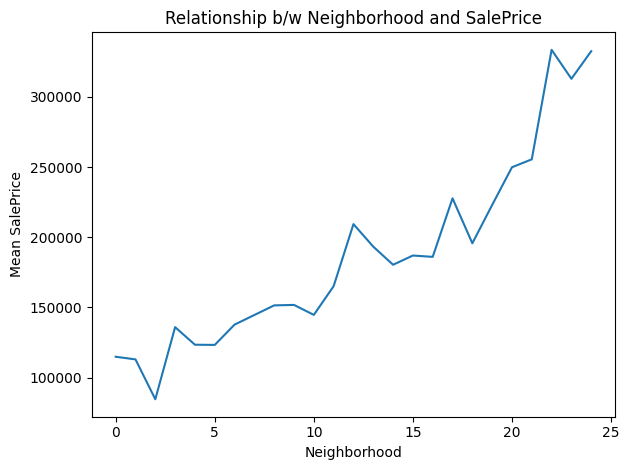

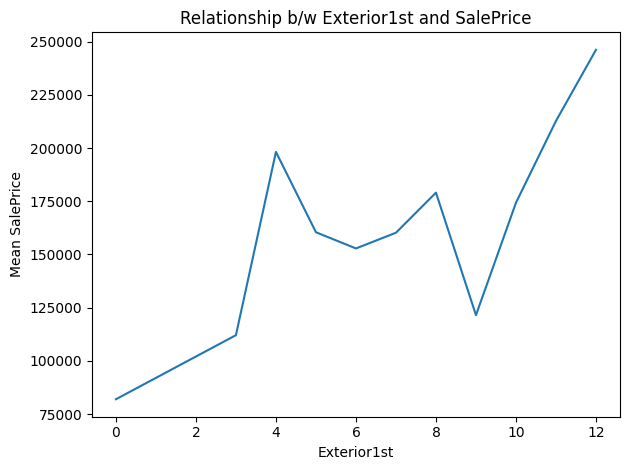

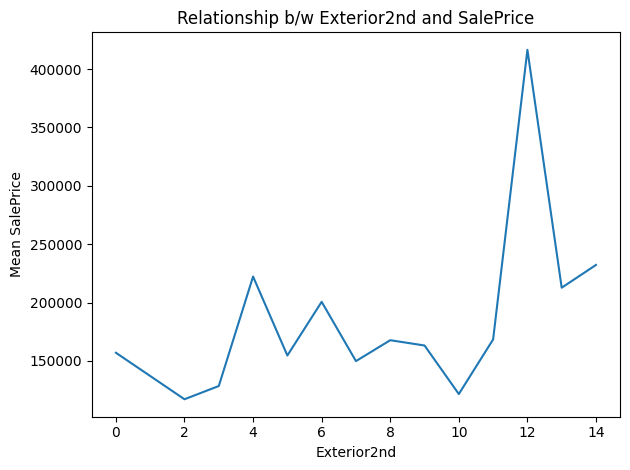

In [51]:
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_test.groupby(X_test[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and SalePrice')
    ax.set_ylabel('Mean SalePrice')
    plt.tight_layout()
    plt.show()

The monotonicity in the test set is somewhat lost, which means that this encoding method may cause over-fitting when training a model.

## 5. Mean Encoding or Target Encoding

In [52]:
# load dataset

data = pd.read_csv(
    "../../titanic.csv", usecols=["cabin", "sex", "embarked", "survived"]
)

data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [53]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo

data["cabin"] = data["cabin"].astype(str).str[0]

In [54]:
# let's fill na

data.fillna("Missing", inplace=True)

In [55]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

survived :  2  labels
sex :  2  labels
cabin :  9  labels
embarked :  4  labels


In [56]:
# Let's explore the cardinality 

cols = ['sex', 'embarked', 'cabin']

for i in cols:
    print(f'{i}: {data[i].unique()}')
    print()

sex: ['female' 'male']

embarked: ['S' 'C' 'Missing' 'Q']

cabin: ['B' 'C' 'E' 'D' 'A' 'n' 'T' 'F' 'G']



In [57]:
target  = 'survived'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (916, 3)
X_test shape: (393, 3)
y_train shape: (916,)
y_test shape: (393,)


### Explore original relationship between categorical variables and target

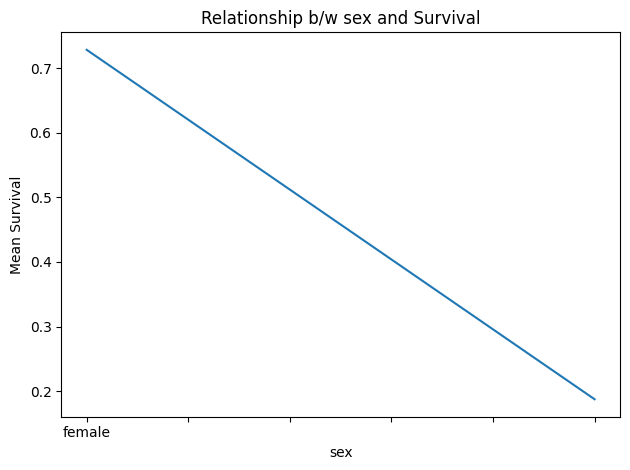

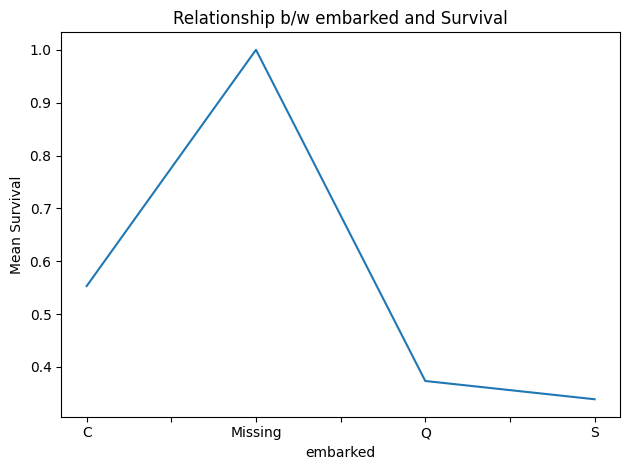

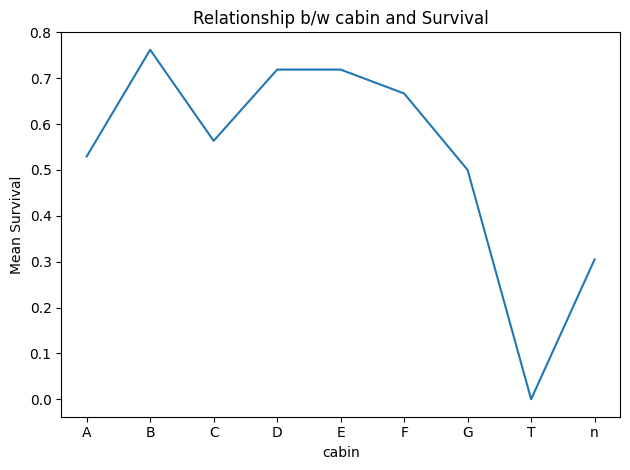

In [58]:
cols = ['sex', 'embarked', 'cabin']
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_train.groupby(X_train[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and Survival')
    ax.set_ylabel('Mean Survival')
    plt.tight_layout()
    plt.show()

In [59]:
# let's calculate the mean target value per category for cabin

y_train.groupby(X_train['cabin']).mean()

cabin
A    0.529412
B    0.761905
C    0.563380
D    0.718750
E    0.718750
F    0.666667
G    0.500000
T    0.000000
n    0.304843
Name: survived, dtype: float64

In [60]:
# and now let's do the same but capturing the result in a dictinary

ordered_labels = y_train.groupby(X_train['cabin']).mean().to_dict()

ordered_labels

{'A': 0.5294117647058824,
 'B': 0.7619047619047619,
 'C': 0.5633802816901409,
 'D': 0.71875,
 'E': 0.71875,
 'F': 0.6666666666666666,
 'G': 0.5,
 'T': 0.0,
 'n': 0.30484330484330485}

In [61]:
# now, we replace the labels with the target means

X_train["cabin"] = X_train["cabin"].map(ordered_labels)
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

In [62]:
# let's explore the result

X_train["cabin"].sample(10)

230     0.761905
219     0.304843
86      0.718750
519     0.304843
225     0.761905
1060    0.304843
1127    0.304843
266     0.304843
447     0.304843
611     0.304843
Name: cabin, dtype: float64

### Creating Functions to automate

In [63]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):
    return target.groupby(df[variable]).mean().to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [64]:
# and now we run a loop over the remaining categorical variables

for variable in ["sex", "embarked"]:
    mappings = find_category_mappings(X_train, variable, y_train)
    integer_encode(X_train, X_test, variable, mappings)

In [65]:
# let's see the result

X_train.head()

,sex,cabin,embarked
501,0.728358,0.304843,0.338957
588,0.728358,0.304843,0.338957
402,0.728358,0.304843,0.553073
1193,0.187608,0.304843,0.373494
686,0.728358,0.304843,0.373494


### Exploring the monotonicity b/w variable and target

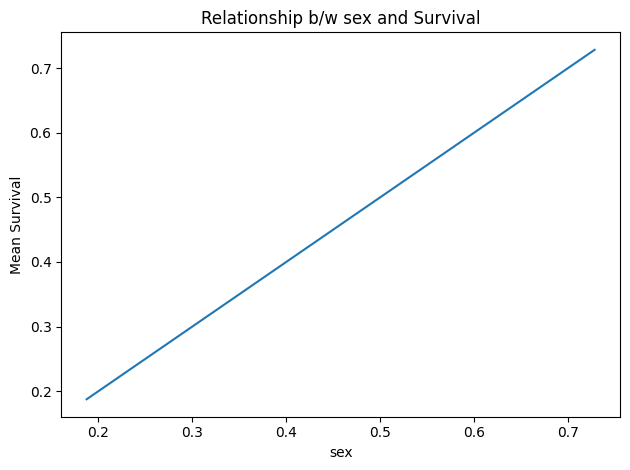

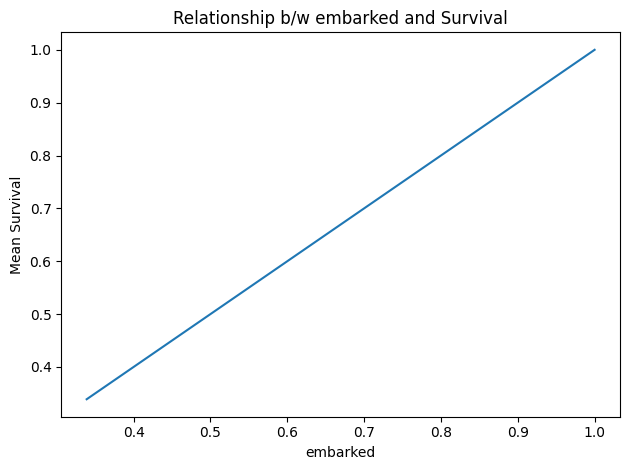

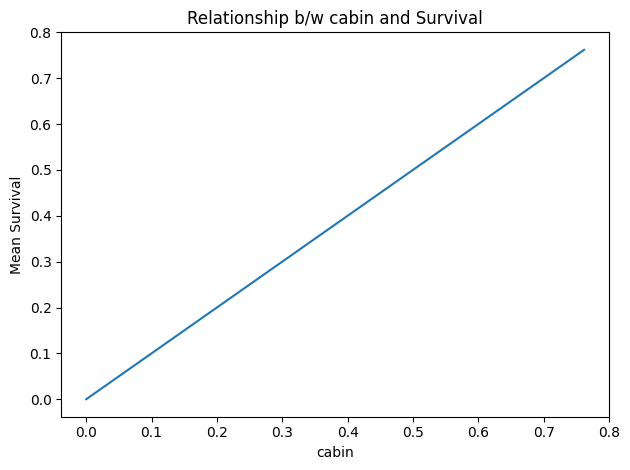

In [66]:
cols = ['sex', 'embarked', 'cabin']
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_train.groupby(X_train[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and Survival')
    ax.set_ylabel('Mean Survival')
    plt.tight_layout()
    plt.show()

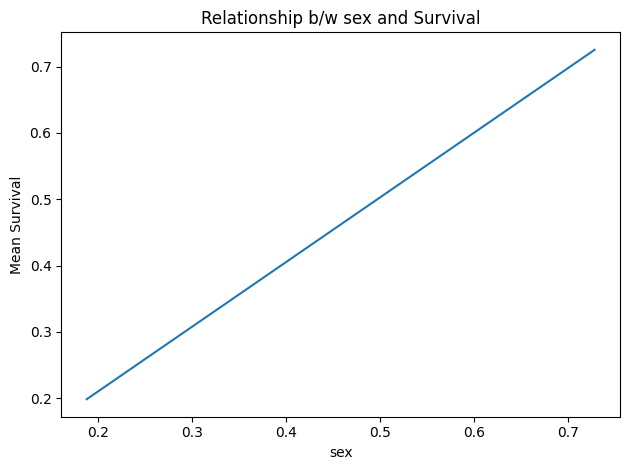

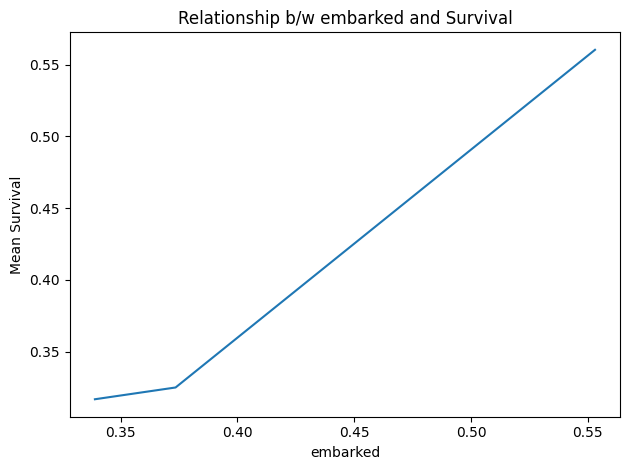

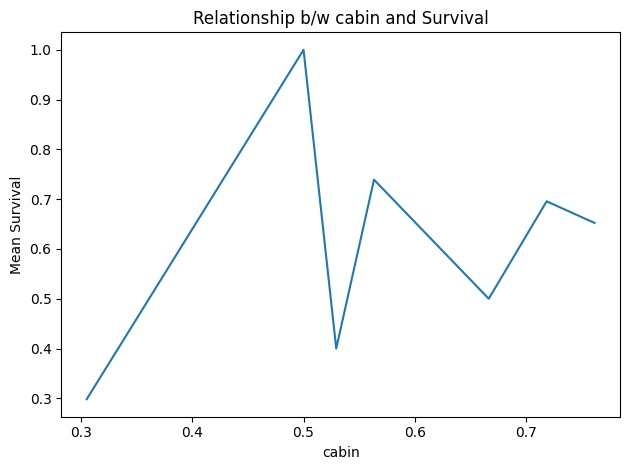

In [67]:
cols = ['sex', 'embarked', 'cabin']
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_test.groupby(X_test[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and Survival')
    ax.set_ylabel('Mean Survival')
    plt.tight_layout()
    plt.show()

The monotonic relationship for embarked is preserved in the test set, but not for cabin. This means that this encoding will not make cabin suitable for linear models.

## 6. Weight of Evidence (WoE)

In [68]:
# load dataset

data = pd.read_csv(
    "../../titanic.csv", usecols=["cabin", "sex", "embarked", "survived"]
)

data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [69]:
# let's remove observations with na in embarked

data.dropna(subset=["embarked"], inplace=True)
data.shape

(1307, 4)

In [70]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo

data["cabin"] = data["cabin"].astype(str).str[0]

In [71]:
# and we remove the observations where cabin = T
# because only few observations show T in the dataset

data = data[data["cabin"] != "T"]
data.shape

(1306, 4)

In [72]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

survived :  2  labels
sex :  2  labels
cabin :  8  labels
embarked :  3  labels


In [73]:
# Let's explore the cardinality 

cols = ['sex', 'embarked', 'cabin']

for i in cols:
    print(f'{i}: {data[i].unique()}')
    print()

sex: ['female' 'male']

embarked: ['S' 'C' 'Q']

cabin: ['B' 'C' 'E' 'D' 'A' 'n' 'F' 'G']



In [74]:
target  = 'survived'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (914, 3)
X_test shape: (392, 3)
y_train shape: (914,)
y_test shape: (392,)


### Explore original relationship between categorical variables and target

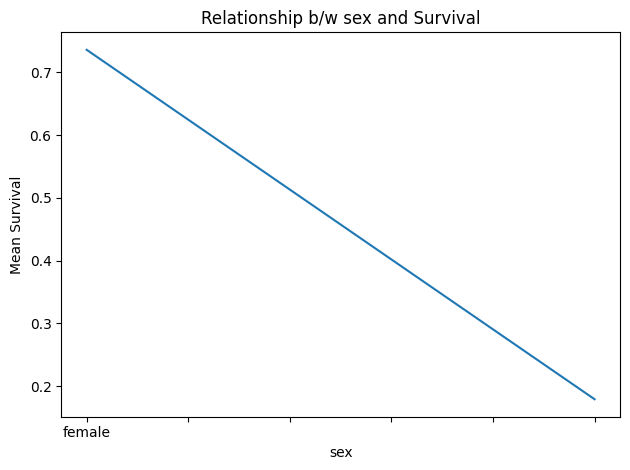

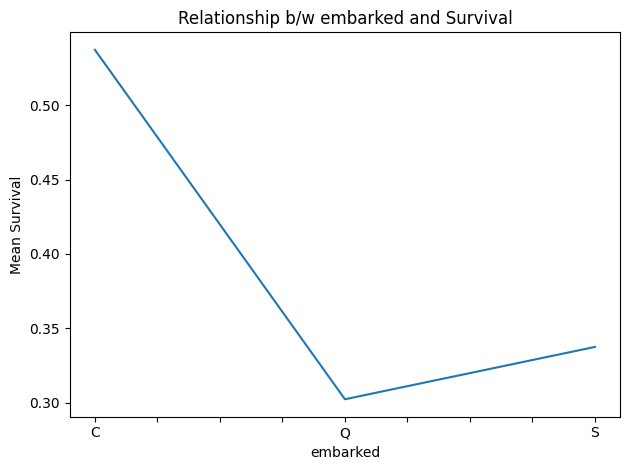

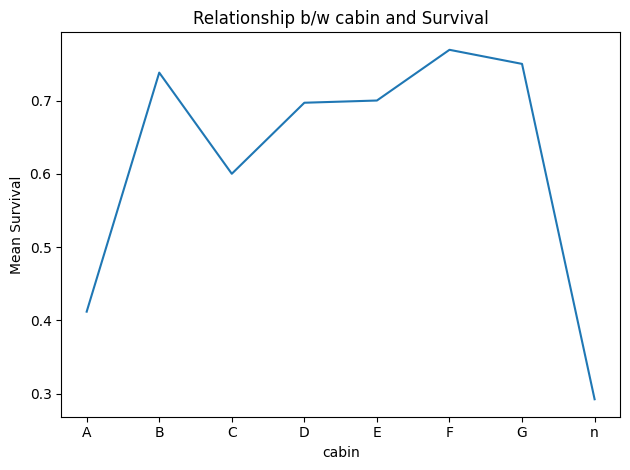

In [75]:
cols = ['sex', 'embarked', 'cabin']
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_train.groupby(X_train[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and Survival')
    ax.set_ylabel('Mean Survival')
    plt.tight_layout()
    plt.show()

In [76]:
X_train

,sex,cabin,embarked
843,male,n,S
869,male,n,S
430,female,n,S
481,female,n,C
1308,male,n,S
...,...,...,...
766,male,n,S
838,male,n,S
1219,male,n,S
562,female,n,Q


In [77]:
# let's calculate the proportion of passengers who survived
# over the total survivors, per category of cabin

# total survivors
total_survived = y_train.sum()

# percentage of passengers who survived, from total survivors
# per category of cabin
survived = ((y_train[y_train == 1]
            ).groupby(X_train['cabin']).count()
           )/total_survived

survived = pd.DataFrame({'survived': survived})
survived

,survived
cabin,
A,0.020408
B,0.090379
C,0.122449
D,0.067055
E,0.061224
F,0.029155
G,0.008746
n,0.600583


In [78]:
# let's calculate the proportion of passengers who did not survive
# over the total passengers who did, per category of cabin


# total passengers who did not survive
total_non_survived = len(y_train) - y_train.sum()

non_survived = ((y_train[y_train == 0]
            ).groupby(X_train['cabin']).count()
           )/total_non_survived

non_survived = pd.DataFrame({'non_survived': non_survived})
non_survived

,non_survived
cabin,
A,0.017513
B,0.019264
C,0.049037
D,0.017513
E,0.015762
F,0.005254
G,0.001751
n,0.873905


In [79]:
# now let's combine those 2 series in a dataframe  and calculate the WoE

# let's concatenate the series in a dataframe
prob_df = pd.concat([survived, non_survived], axis=1)

# let's calculate the Weight of Evidence
prob_df['WoE'] = np.log(prob_df['survived']/prob_df['non_survived'])

prob_df

,survived,non_survived,WoE
cabin,,,
A,0.020408,0.017513,0.152984
B,0.090379,0.019264,1.545751
C,0.122449,0.049037,0.915124
D,0.067055,0.017513,1.342568
E,0.061224,0.015762,1.356957
F,0.029155,0.005254,1.713632
G,0.008746,0.001751,1.608271
n,0.600583,0.873905,-0.375071


In [80]:
# and now let's capture the WoE in a dictionary 

ordered_labels = prob_df['WoE'].to_dict()
ordered_labels

{'A': 0.1529838185513379,
 'B': 1.545750694176846,
 'C': 0.9151238705982346,
 'D': 1.3425678854251744,
 'E': 1.356956622877274,
 'F': 1.7136315668160063,
 'G': 1.60827105115818,
 'n': -0.37507116447186734}

In [81]:
# now, we replace the labels with the woe

X_train["cabin"] = X_train["cabin"].map(ordered_labels)
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

In [82]:
X_train['cabin'].sample(10)

705    -0.375071
1085   -0.375071
495    -0.375071
257     0.915124
1010   -0.375071
882    -0.375071
748    -0.375071
813    -0.375071
172     1.356957
714    -0.375071
Name: cabin, dtype: float64

### Creating Functions to Automate

In [83]:
tmp = X_train.copy()
def find_category_mappings(df, variable, target):
    
    # copy of the original dataframe, for safety 
    tmp = df.copy()
    
    # total positive class
    total_pos = target.sum()
    
    # total negative class
    total_neg = len(df) - total_pos
    
    # % of positive class per category, respect to total positive class
    pos_perc = ((target[target == 1]
            ).groupby(df[variable]).count()
           )/total_pos
    
    # % of positive class per category, respect to total positive class
    neg_perc = ((target[target == 0]
            ).groupby(df[variable]).count()
           )/total_neg
    
    # Converting it to dataframes
    pos_perc = pd.DataFrame({'pos_perc': pos_perc})
    neg_perc = pd.DataFrame({'neg_perc': neg_perc})
    
    # let's concatenate
    prob_tmp = pd.concat([pos_perc, neg_perc], axis=1)
    
    # let's calculate the Weight of Evidence
    prob_tmp['WoE'] = np.log(prob_tmp['pos_perc'] / prob_tmp['neg_perc'])
    
    return prob_tmp['WoE'].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):
    
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [84]:
for variable in ['sex', 'embarked']:
    mappings = find_category_mappings(X_train, variable, y_train)
    integer_encode(X_train, X_test, variable, mappings)

In [85]:
tmp

,sex,cabin,embarked
843,male,-0.375071,S
869,male,-0.375071,S
430,female,-0.375071,S
481,female,-0.375071,C
1308,male,-0.375071,S
...,...,...,...
766,male,-0.375071,S
838,male,-0.375071,S
1219,male,-0.375071,S
562,female,-0.375071,Q


In [86]:
X_train.head()

,sex,cabin,embarked
843,-1.013111,-0.375071,-0.164796
869,-1.013111,-0.375071,-0.164796
430,1.535068,-0.375071,-0.164796
481,1.535068,-0.375071,0.658871
1308,-1.013111,-0.375071,-0.164796


### Exploring the monotonicity b/w variable and target

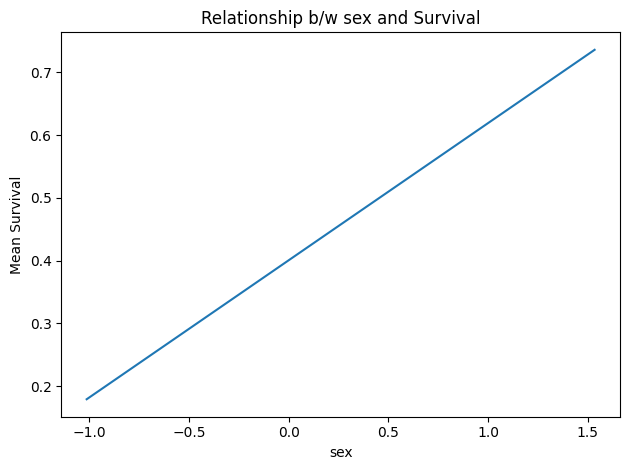

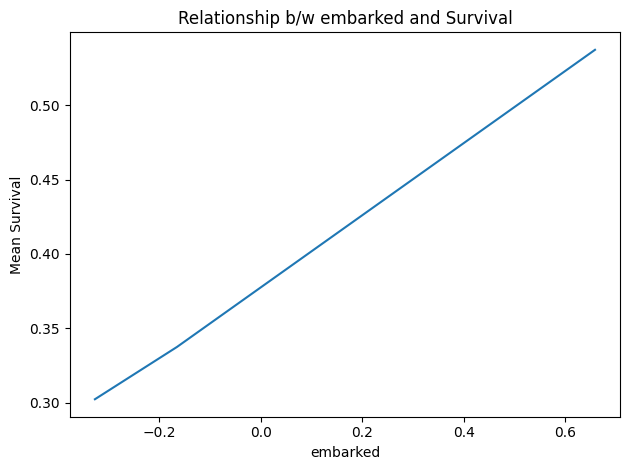

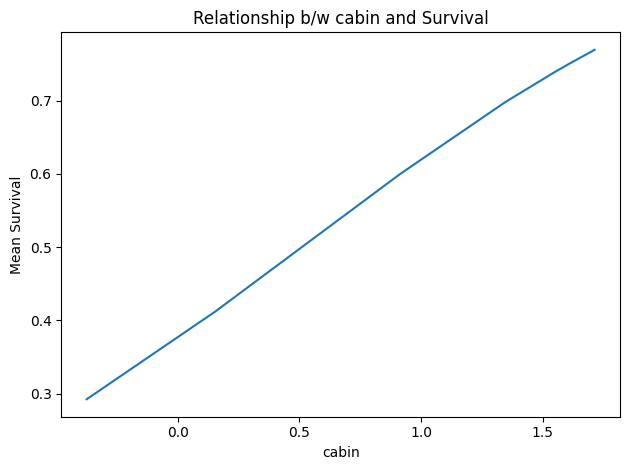

In [87]:
cols = ['sex', 'embarked', 'cabin']
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_train.groupby(X_train[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and Survival')
    ax.set_ylabel('Mean Survival')
    plt.tight_layout()
    plt.show()

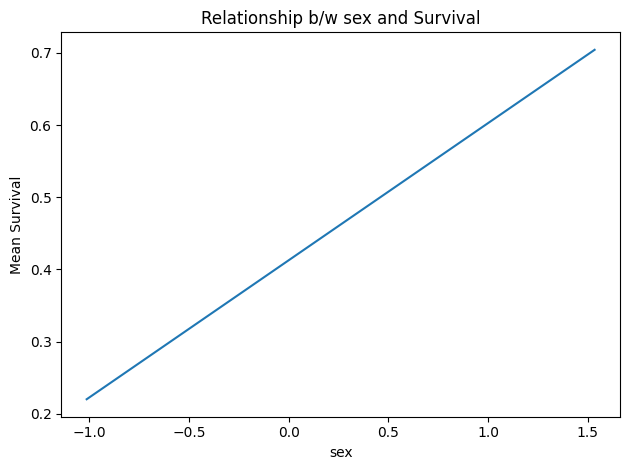

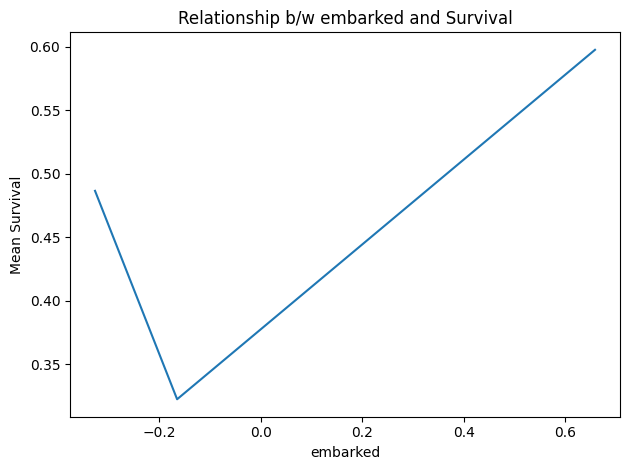

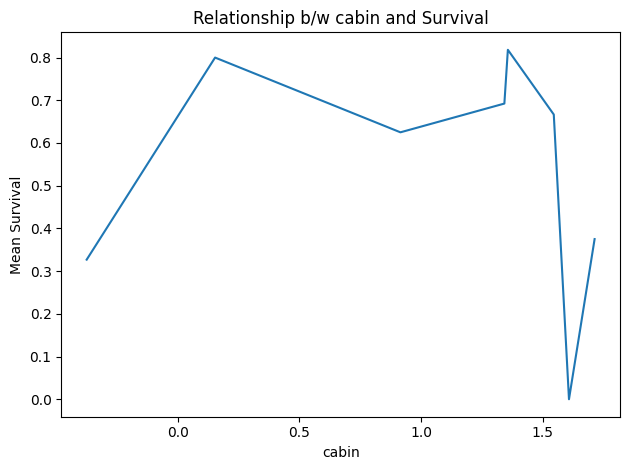

In [88]:
cols = ['sex', 'embarked', 'cabin']
for col in cols:
    
    fig, ax = plt.subplots()
    ax = y_test.groupby(X_test[col]).mean().plot()
    ax.set_title(f'Relationship b/w {col} and Survival')
    ax.set_ylabel('Mean Survival')
    plt.tight_layout()
    plt.show()

The monotonic relationship does not hold when encoding the categorical variables in the test set. This could mean that the categories are not informative of the target or the proportion of survivors is not homogeneous between in the categories in the train and test sets. 
### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set.

**In addition, it will create NA or Inf if any of the 2 terms in the ratio of the WoE formula are 0**

## 7. OHE of Frequent Categories

In [89]:
# load dataset

data = pd.read_csv(
    "../../houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [90]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [91]:
# Let's explore the cardinality 

cols = ["Neighborhood", "Exterior1st", "Exterior2nd"]

for i in cols:
    print(f'{i}: {data[i].unique()}')
    print()

Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']



In [92]:
target  = 'SalePrice'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1022, 3)
X_test shape: (438, 3)
y_train shape: (1022,)
y_test shape: (438,)


In [93]:
# let's first examine how OHE expands the feature space

pd.get_dummies(X_train, drop_first=True).shape

(1022, 53)

In [94]:
# let's find the top 10 most frequent categories for the variable 'Neighborhood'

X_train["Neighborhood"].value_counts().sort_values(ascending=False).head(10)

NAmes      151
CollgCr    105
OldTown     73
Edwards     71
Sawyer      61
Somerst     56
Gilbert     55
NWAmes      51
NridgHt     51
SawyerW     45
Name: Neighborhood, dtype: int64

In [95]:
# let's make a list with the most frequent categories of the variable

top_10 = [
    x for x in X_train['Neighborhood']
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
    .index
]

top_10

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Sawyer',
 'Somerst',
 'Gilbert',
 'NWAmes',
 'NridgHt',
 'SawyerW']

In [96]:
# and now we make the 10 binary variables

for label in top_10:
    X_train['Neighborhood' + '_' + label] = np.where(
        X_train['Neighborhood'] == label, 1, 0
    )
    
    X_test["Neighborhood" + "_" + label] = np.where(
        X_test["Neighborhood"] == label, 1, 0
    )
    
# let's visualise the result
X_train[["Neighborhood"] + ["Neighborhood" + "_" + c for c in top_10]].head(10)

,Neighborhood,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW
64,CollgCr,0,1,0,0,0,0,0,0,0,0
682,ClearCr,0,0,0,0,0,0,0,0,0,0
960,BrkSide,0,0,0,0,0,0,0,0,0,0
1384,Edwards,0,0,0,1,0,0,0,0,0,0
1100,SWISU,0,0,0,0,0,0,0,0,0,0
416,Sawyer,0,0,0,0,1,0,0,0,0,0
1034,Crawfor,0,0,0,0,0,0,0,0,0,0
853,NAmes,1,0,0,0,0,0,0,0,0,0
472,Edwards,0,0,0,1,0,0,0,0,0,0
1011,Edwards,0,0,0,1,0,0,0,0,0,0


### Creating Functions to Automate

In [97]:
# we can turn the previous commands into 2 functions


def calculate_top_categories(df, variable, how_many=10):
    return [
        x
        for x in df[variable]
        .value_counts()
        .sort_values(ascending=False)
        .head(how_many)
        .index
    ]


def one_hot_encode(train, test, variable, top_x_labels):

    for label in top_x_labels:
        train[variable + "_" + label] = np.where(train[variable] == label, 1, 0)

        test[variable + "_" + label] = np.where(test[variable] == label, 1, 0)

In [98]:
# and now we run a loop over the remaining categorical variables

for variable in ["Exterior1st", "Exterior2nd"]:

    top_categories = calculate_top_categories(X_train, variable, how_many=10)

    one_hot_encode(X_train, X_test, variable, top_categories)

In [99]:
# let's see the result

X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
682,ClearCr,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
960,BrkSide,Wd Sdng,Plywood,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1384,Edwards,WdShing,Wd Shng,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1100,SWISU,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Note how we now have 30 additional dummy variables instead of the 53 that we would have had if we had created dummies for all categories.

## 8. Engineering Rare Categories

In [100]:
# let's load the house price dataset

data = pd.read_csv("../../houseprice.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
target  = 'SalePrice'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1022, 80)
X_test shape: (438, 80)
y_train shape: (1022,)
y_test shape: (438,)


### Variables with one dominant category

In [102]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in X_train.columns:
    
    if X_train[col].dtypes == "O": # if the variable is categorical
        
        if X_train[col].nunique() < 3: # if the variable has less than 3 categories
            
            # print percentage of observations per category
            print(X_train.groupby(col)[col].count()/len(X_train))
            print()

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



#### Conclusion

The 3 variables above, Street, Utilities and CentralAir, show one dominating category which accounts for more than 93-99% of the observations. Re-grouping the rare label in this situation does not make any sense. We could determine if these variables are useful with exploratory analysis, or any feature selection algorithm, or drop the variables altogether.

#### Variables with few categories

The variables above have only 4 categories, and in all three cases, there is at least one category that is infrequent, that is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else.

For example the first variable MasVnrType shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label will leave the variable in the same situation.

The second variable ExterQual, contains 2 rare labels Ex and Fa, we could group these 2 into a new label called 'Rare'.

The third variable BsmtCond contains 3 rare labels, Fa, Gd and Po, so we could group these 3 under the new label 'Rare'.

In [103]:
# the columns in the below list have only 4 different labels

cols = ["MasVnrType", "ExterQual", "BsmtCond"]

for col in cols:

    print(X_train.groupby(col)[col].count() / len(X_train))  # frequency
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.595890
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



The variables above have only 4 categories, and in all three cases, there is at least one category that is infrequent, that is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else.

For example the first variable MasVnrType shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label will leave the variable in the same situation.

The second variable ExterQual, contains 2 rare labels Ex and Fa, we could group these 2 into a new label called 'Rare'.

The third variable BsmtCond contains 3 rare labels, Fa, Gd and Po, so we could group these 3 under the new label 'Rare'.

#### Variable with high cardinality

In [104]:
# let's explore examples in which variables have several categories, say more than 10

multi_cat_cols = []

for col in X_train.columns:

    if X_train[col].dtypes == "O":  # if variable  is categorical

        if X_train[col].nunique() > 10:  # and has more than 10 categories

            multi_cat_cols.append(col)  # add to the list

            print(
                X_train.groupby(col)[col].count() / len(X_train)
            )  # and print the percentage of observations within each category

            print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

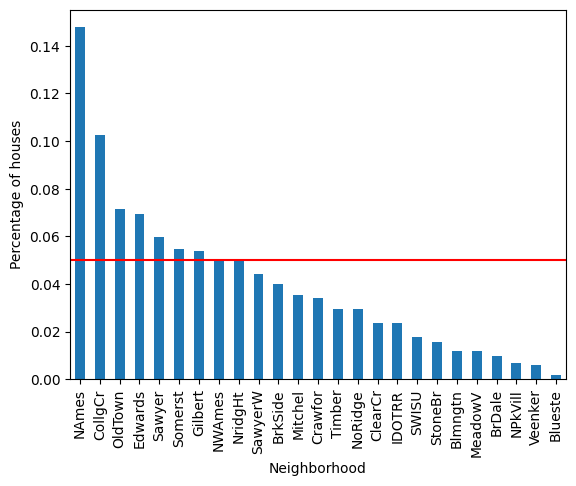

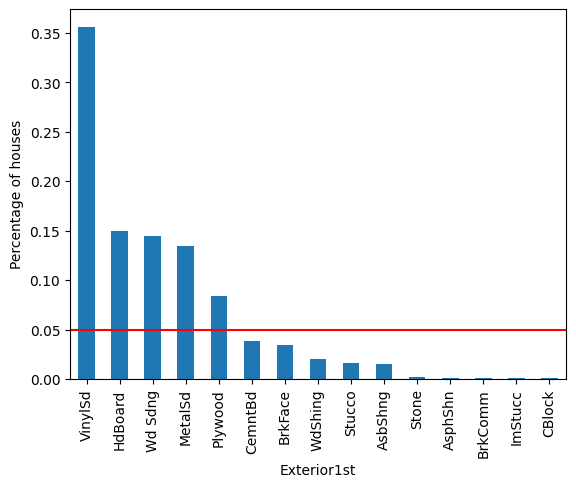

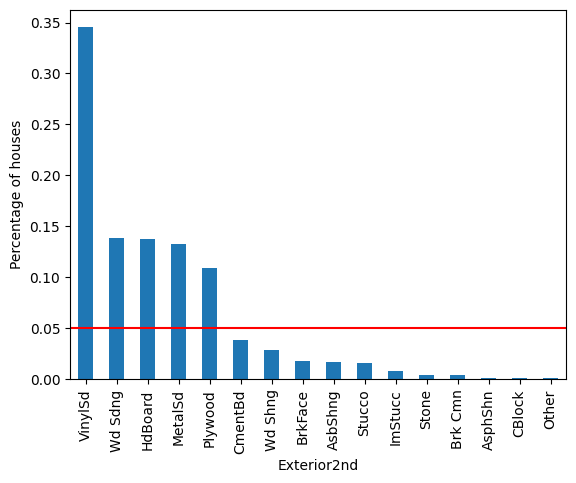

In [105]:
for col in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    # add a line at 5% to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

#### Re-grouping rare labels with pandas

In [106]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts(normalize=True).sort_values(ascending=False)
    
    non_rare = [x for x in temp.loc[temp > tolerance].index.values]
    
    return non_rare

In [107]:
# non rare labels
find_non_rare_labels(X_train, 'Neighborhood', 0.05)

['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst', 'Gilbert']

In [108]:
# rare labels

def find_rare_labels(df, variable):
    
    return [
        x for x in df[variable].unique()
        if x not in find_non_rare_labels(df, variable, 0.05)
    ]

In [109]:
find_rare_labels(X_train, 'Neighborhood')

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [110]:
def rare_encoding(train, test, variable, tolerance):

    # find the most frequent category
    frequent_cat = find_non_rare_labels(train, variable, tolerance)
    
    # re-group rare labels
    train[variable] = np.where(
        train[variable].isin(frequent_cat), train[variable], 'Rare')
    
    test[variable] = np.where(
        test[variable].isin(frequent_cat), test[variable], 'Rare')

    return train, test

In [111]:
for col in ["Neighborhood", "Exterior1st", "Exterior2nd"]:
    X_train, X_test = rare_encoding(X_train, X_test, col, 0.05)

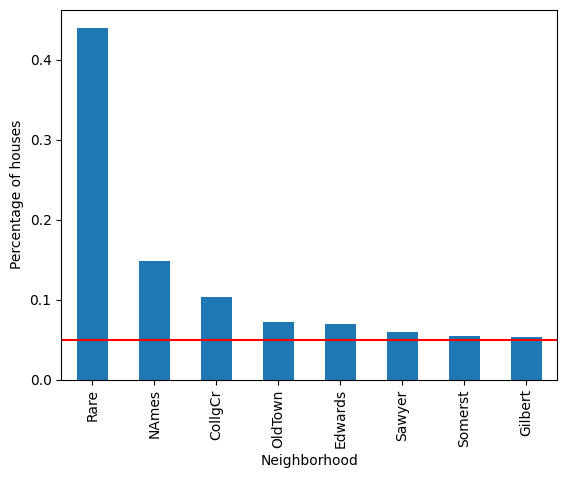

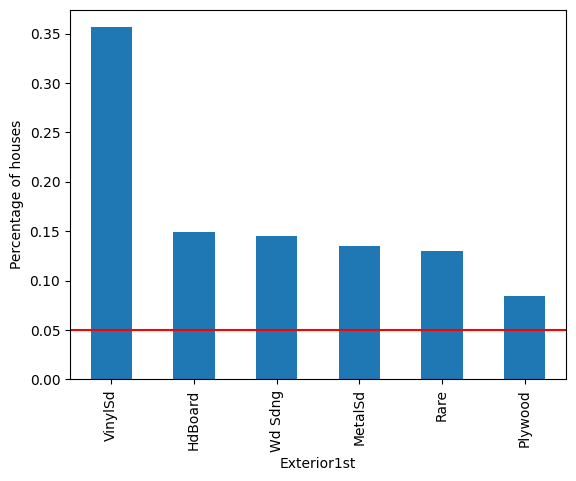

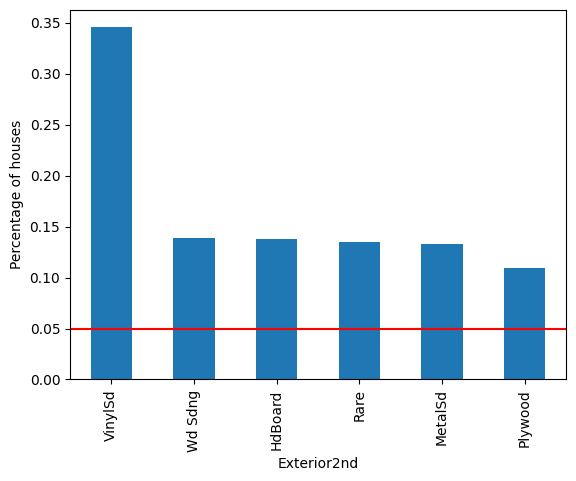

In [112]:
for col in ["Neighborhood", "Exterior1st", "Exterior2nd"]:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()

And now let's encode the low cardinal variables.

In [113]:
for variable in ["MasVnrType", "ExterQual", "BsmtCond"]:

    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

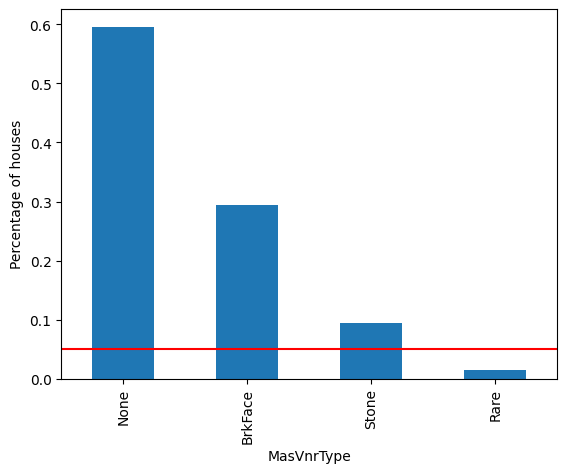

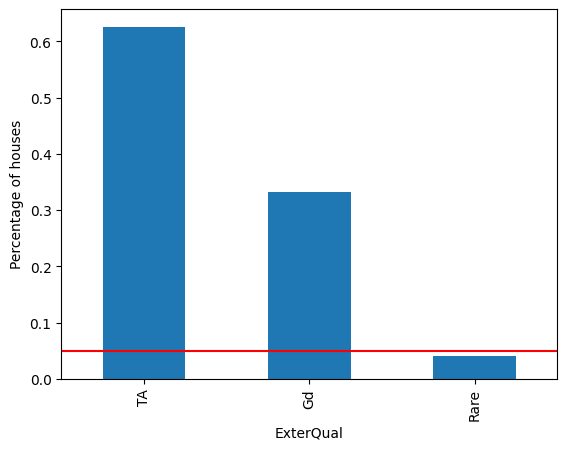

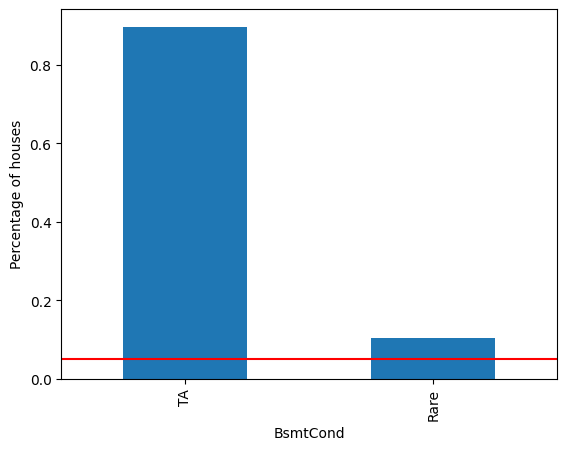

In [114]:
for col in ["MasVnrType", "ExterQual", "BsmtCond"]:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color="red")
    fig.set_ylabel("Percentage of houses")
    plt.show()